# Bird Migration Analysis: BirdCast + VIIRS + Weather Data
## Comprehensive Exploratory Data Analysis

This notebook explores the merged dataset combining:
- **BirdCast**: Bird migration metrics (peak direction, speed, altitude, bird counts)
- **VIIRS**: Nighttime lights data (light pollution indicators)
- **Weather**: Open-Meteo weather data (temperature, humidity, cloud cover, wind, precipitation)

**Goal**: Understand relationships between environmental factors and bird migration patterns.

In [72]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [73]:
# Load the merged dataset with weather data
data_path = Path("../data/processed_data/birdcast+viirs+weather/merged_dataset_with_weather.csv")
df = pd.read_csv(data_path)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"States: {df['state'].unique()}")
print(f"\n✓ Data loaded successfully")

Dataset shape: (1542, 33)
Date range: 2021-03-23 00:00:00 to 2025-11-03 00:00:00
States: ['NJ' 'VT']

✓ Data loaded successfully


## 1. Dataset Overview

### Basic Information

In [74]:
# Display basic info
print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

DATASET OVERVIEW

Shape: 1542 rows × 33 columns

Column Types:
date                              datetime64[ns]
state                                     object
gapfilled_ntl                            float64
ntl_variability                          float64
lunar_irradiance                         float64
quality_score                            float64
total_passed                             float64
peak_birds                               float64
peak_direction                            object
peak_speed_mph                           float64
peak_altitude_ft                         float64
day_of_year                                int64
month                                      int64
year                                       int64
season                                    object
peak_speed_missing                         int64
peak_altitude_missing                      int64
temperature_2m (°C)                      float64
relative_humidity_2m (%)                 float64
appare

,date,state,gapfilled_ntl,ntl_variability,lunar_irradiance,quality_score,total_passed,peak_birds,peak_direction,peak_speed_mph,...,wind_direction_10m (°),dew_point_2m (°C),soil_temperature_0_to_7cm (°C),rain (mm),snowfall (cm),wind_gusts_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),vapour_pressure_deficit (kPa),hour
0,2021-03-23,NJ,24.047034,0.161270,8.744138,0.934899,15500.0,23900.0,Low activity,-1.0,...,94.000000,7.142857,7.842857,0.000000,0.0,20.014286,22.185714,110.000000,0.042857,3.000000
1,2021-03-23,VT,24.022632,0.123816,0.563050,0.990016,386400.0,203700.0,NNE,32.0,...,157.142857,-0.014286,9.328571,0.000000,0.0,27.628571,27.657143,174.857143,0.567143,3.000000
2,2021-03-24,NJ,34.063942,0.376018,9.484937,0.954015,86700.0,120200.0,NE,23.0,...,192.076923,10.992308,10.738462,1.061538,0.0,20.476923,18.038462,177.769231,0.020000,11.076923
3,2021-03-24,VT,34.379735,0.125677,0.428179,0.995336,65800.0,86200.0,NNE,17.0,...,169.153846,6.123077,9.446154,0.053846,0.0,40.376923,31.753846,170.692308,0.383077,11.076923
4,2021-03-25,NJ,47.293919,0.023898,7.785215,0.992677,1659400.0,1026400.0,NNE,15.0,...,183.461538,13.361538,14.046154,0.015385,0.0,32.761538,29.100000,189.076923,0.139231,11.076923


In [75]:
# Missing value analysis
print("\n" + "="*70)
print("MISSING VALUES")
print("="*70)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing[missing > 0],
    'Percentage': missing_pct[missing > 0]
}).sort_values('Missing Count', ascending=False)

print(missing_df)


MISSING VALUES
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


## 2. BirdCast Migration Metrics

In [76]:
# Summary statistics for bird migration metrics
print("="*70)
print("BIRDCAST MIGRATION METRICS - SUMMARY STATISTICS")
print("="*70)

migration_cols = ['total_passed', 'peak_birds', 'peak_speed_mph', 'peak_altitude_ft']
print(df[migration_cols].describe())

# Direction breakdown
print("\n" + "="*70)
print("PEAK DIRECTION DISTRIBUTION")
print("="*70)
direction_counts = df['peak_direction'].value_counts()
print(direction_counts)

BIRDCAST MIGRATION METRICS - SUMMARY STATISTICS
       total_passed    peak_birds  peak_speed_mph  peak_altitude_ft
count  1.542000e+03  1.542000e+03     1542.000000       1542.000000
mean   1.151085e+06  7.733592e+05       16.576524       1460.486381
std    2.476197e+06  1.313490e+06       12.609558       1046.982861
min    0.000000e+00  3.000000e+02       -1.000000         -1.000000
25%    1.702500e+04  5.197500e+04        7.000000        800.000000
50%    1.382500e+05  1.973500e+05       17.000000       1500.000000
75%    1.030100e+06  8.966000e+05       25.000000       2100.000000
max    2.522160e+07  1.002330e+07       59.000000       5900.000000

PEAK DIRECTION DISTRIBUTION
peak_direction
Low activity    330
NE              212
NNE             179
SSW             169
SW              168
S               125
SSE              69
ENE              62
SE               60
WSW              59
N                51
ESE              23
NNW              14
E                 8
NW              

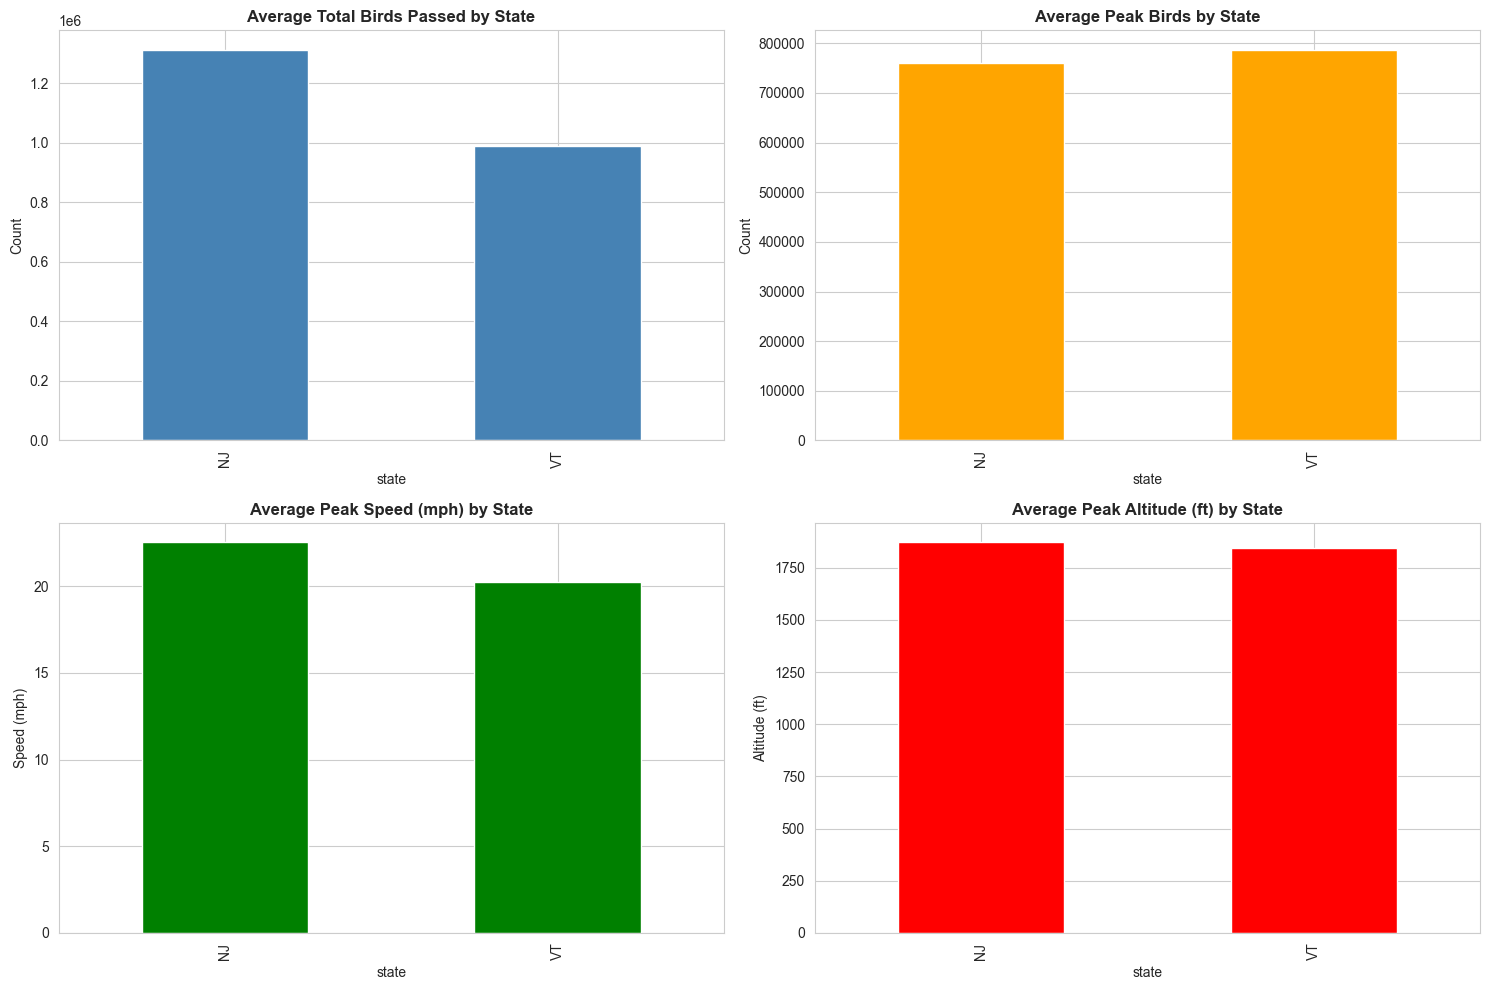

In [77]:
# Visualize migration metrics by state
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Total Passed
df.groupby('state')['total_passed'].mean().plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Average Total Birds Passed by State', fontweight='bold')
axes[0, 0].set_ylabel('Count')

# Peak Birds
df.groupby('state')['peak_birds'].mean().plot(kind='bar', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Average Peak Birds by State', fontweight='bold')
axes[0, 1].set_ylabel('Count')

# Peak Speed (excluding -1 sentinel values)
speed_data = df[df['peak_speed_mph'] > 0].groupby('state')['peak_speed_mph'].mean()
speed_data.plot(kind='bar', ax=axes[1, 0], color='green')
axes[1, 0].set_title('Average Peak Speed (mph) by State', fontweight='bold')
axes[1, 0].set_ylabel('Speed (mph)')

# Peak Altitude (excluding -1 sentinel values)
alt_data = df[df['peak_altitude_ft'] > 0].groupby('state')['peak_altitude_ft'].mean()
alt_data.plot(kind='bar', ax=axes[1, 1], color='red')
axes[1, 1].set_title('Average Peak Altitude (ft) by State', fontweight='bold')
axes[1, 1].set_ylabel('Altitude (ft)')

plt.tight_layout()
plt.show()

## 3. Light Pollution (VIIRS) Analysis

In [78]:
# VIIRS light pollution metrics
print("="*70)
print("VIIRS NIGHTTIME LIGHTS - SUMMARY STATISTICS")
print("="*70)

viirs_cols = ['gapfilled_ntl', 'ntl_variability', 'lunar_irradiance', 'quality_score']
print(df[viirs_cols].describe())

# Light pollution by state
print("\n" + "="*70)
print("VIIRS METRICS BY STATE")
print("="*70)
print(df.groupby('state')[viirs_cols].mean())

VIIRS NIGHTTIME LIGHTS - SUMMARY STATISTICS
       gapfilled_ntl  ntl_variability  lunar_irradiance  quality_score
count    1542.000000      1542.000000       1542.000000    1542.000000
mean       24.794244         0.533196          4.385702       0.984852
std        36.498689         2.881926          3.869667       0.025658
min         0.000000         0.000000          0.000000       0.853354
25%         0.500000         0.000000          0.626603       0.983146
50%         0.732087         0.000000          1.094286       0.995801
75%        41.041921         0.074605          8.079332       0.999315
max       160.428977        65.690982         11.313858       1.000000

VIIRS METRICS BY STATE
       gapfilled_ntl  ntl_variability  lunar_irradiance  quality_score
state                                                                 
NJ         24.813942         0.617878          8.078094       0.979914
VT         24.774186         0.446963          0.625649       0.989881


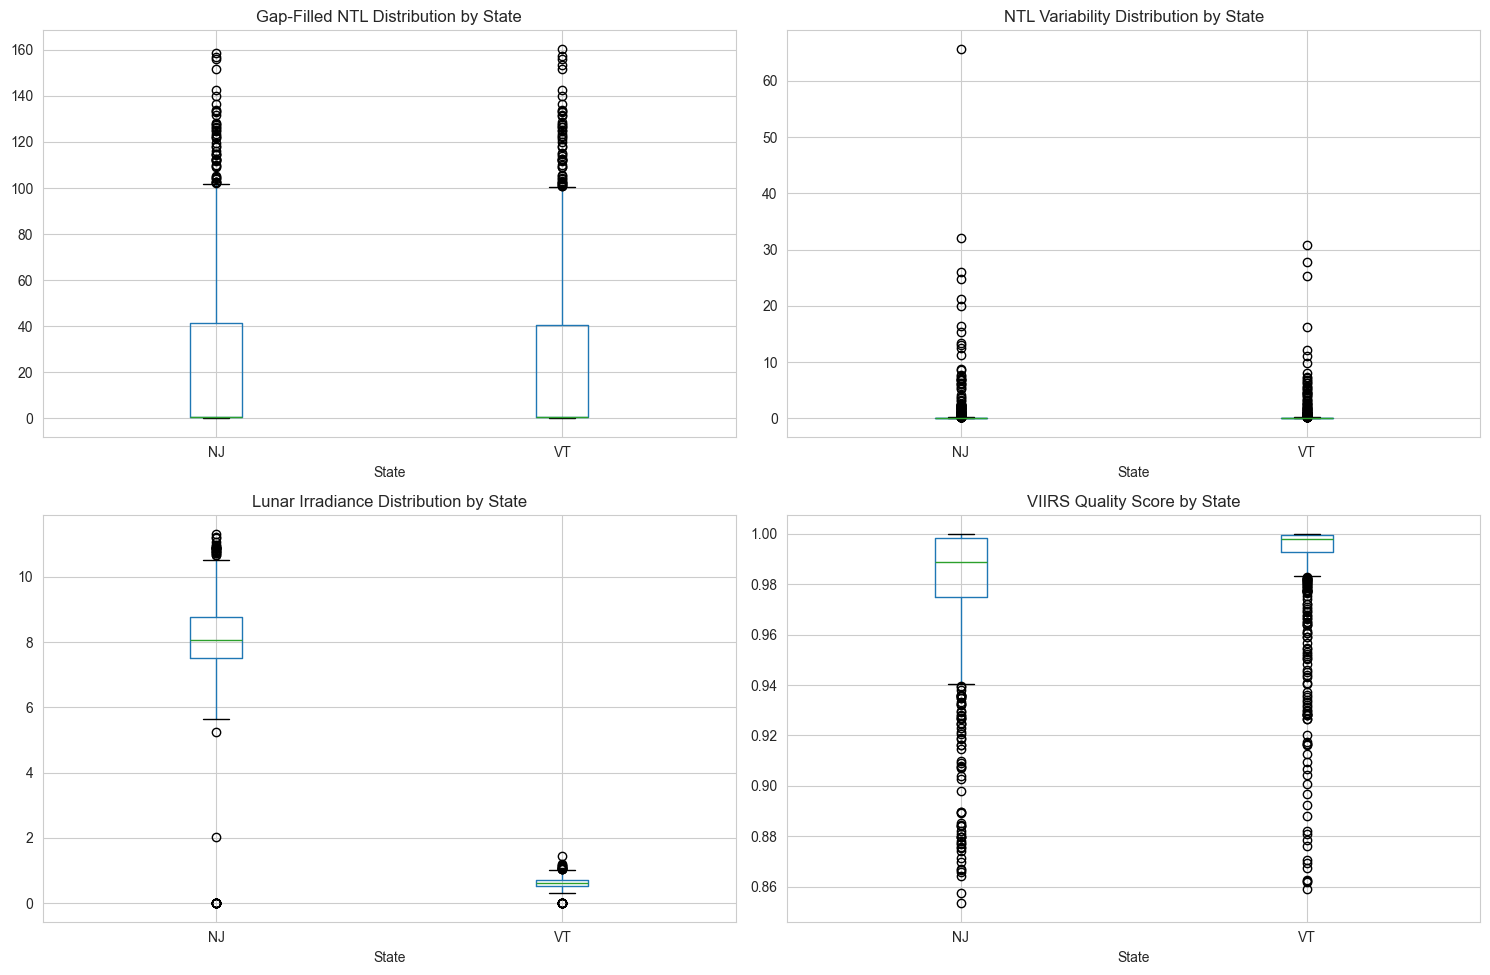

In [79]:
# Visualize VIIRS metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gap-filled NTL
df.boxplot(column='gapfilled_ntl', by='state', ax=axes[0, 0])
axes[0, 0].set_title('Gap-Filled NTL Distribution by State')
axes[0, 0].set_xlabel('State')

# NTL Variability
df.boxplot(column='ntl_variability', by='state', ax=axes[0, 1])
axes[0, 1].set_title('NTL Variability Distribution by State')
axes[0, 1].set_xlabel('State')

# Lunar Irradiance
df.boxplot(column='lunar_irradiance', by='state', ax=axes[1, 0])
axes[1, 0].set_title('Lunar Irradiance Distribution by State')
axes[1, 0].set_xlabel('State')

# Quality Score
df.boxplot(column='quality_score', by='state', ax=axes[1, 1])
axes[1, 1].set_title('VIIRS Quality Score by State')
axes[1, 1].set_xlabel('State')

plt.suptitle('')  # Remove the automatic title
plt.tight_layout()
plt.show()

## 4. Weather Data Analysis

In [80]:
# Get weather columns
weather_cols = [col for col in df.columns if col.startswith(('temperature', 'relative_', 'apparent_', 
                                                              'cloud_', 'surface_', 'wind_', 'dew_',
                                                              'soil_', 'rain', 'snowfall', 'vapour_'))]

print("="*70)
print("WEATHER DATA - SUMMARY STATISTICS")
print("="*70)
print(df[weather_cols].describe())

WEATHER DATA - SUMMARY STATISTICS
       temperature_2m (°C)  relative_humidity_2m (%)  \
count          1542.000000               1542.000000   
mean             13.194922                 73.478599   
std               6.672339                 14.515102   
min             -14.961538                 34.076923   
25%               8.392308                 62.615385   
50%              13.923077                 74.076923   
75%              18.467308                 85.596154   
max              29.853846                100.000000   

       apparent_temperature (°C)  cloud_cover (%)  surface_pressure (hPa)  \
count                1542.000000      1542.000000             1542.000000   
mean                   11.497330        57.055095             1007.221709   
std                     8.589786        35.776798                8.249526   
min                   -19.992308         0.000000              977.176923   
25%                     5.292308        22.769231             1001.863462   

In [81]:
# Weather by state
print("\n" + "="*70)
print("WEATHER METRICS BY STATE (First 10 columns)")
print("="*70)
print(df.groupby('state')[weather_cols[:10]].mean())


WEATHER METRICS BY STATE (First 10 columns)
       temperature_2m (°C)  relative_humidity_2m (%)  \
state                                                  
NJ               13.637279                  76.93675   
VT               12.744459                  69.95708   

       apparent_temperature (°C)  cloud_cover (%)  surface_pressure (hPa)  \
state                                                                       
NJ                     12.269762        51.891254             1011.169919   
VT                     10.710743        62.313561             1003.201149   

       wind_speed_10m (km/h)  wind_direction_10m (°)  dew_point_2m (°C)  \
state                                                                     
NJ                 11.185816              198.837947           9.331249   
VT                 12.196128              202.047609           6.906798   

       soil_temperature_0_to_7cm (°C)  rain (mm)  
state                                             
NJ                

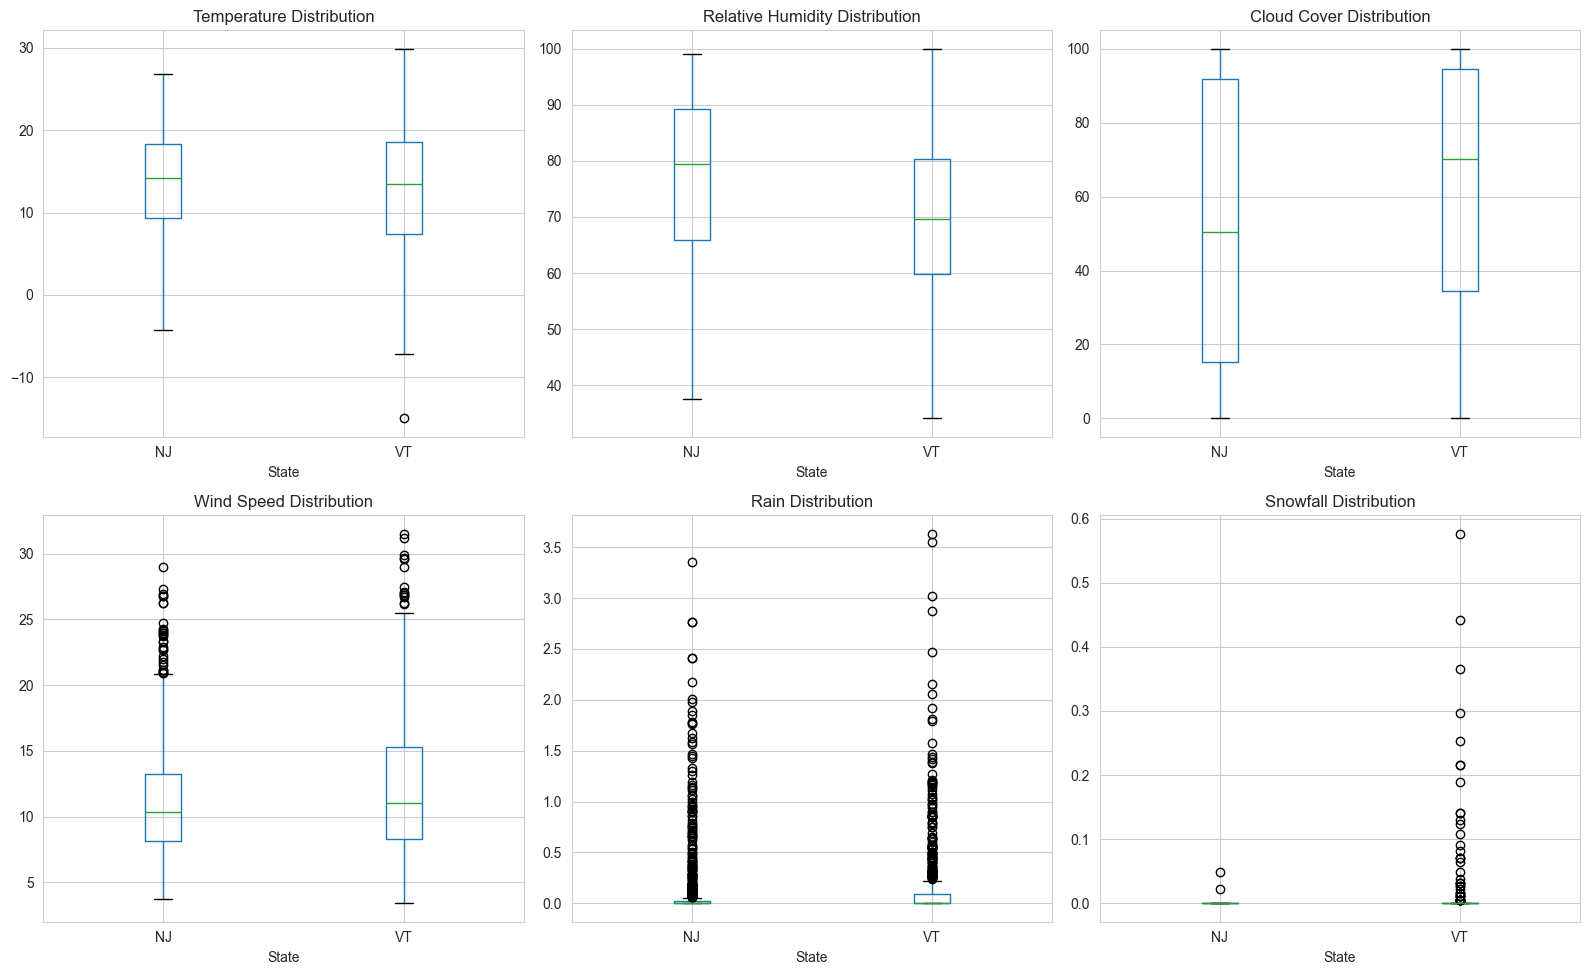

In [82]:
# Visualize key weather variables
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Temperature
df.boxplot(column='temperature_2m (°C)', by='state', ax=axes[0, 0])
axes[0, 0].set_title('Temperature Distribution')
axes[0, 0].set_xlabel('State')

# Relative Humidity
df.boxplot(column='relative_humidity_2m (%)', by='state', ax=axes[0, 1])
axes[0, 1].set_title('Relative Humidity Distribution')
axes[0, 1].set_xlabel('State')

# Cloud Cover
df.boxplot(column='cloud_cover (%)', by='state', ax=axes[0, 2])
axes[0, 2].set_title('Cloud Cover Distribution')
axes[0, 2].set_xlabel('State')

# Wind Speed
df.boxplot(column='wind_speed_10m (km/h)', by='state', ax=axes[1, 0])
axes[1, 0].set_title('Wind Speed Distribution')
axes[1, 0].set_xlabel('State')

# Precipitation (Rain)
df.boxplot(column='rain (mm)', by='state', ax=axes[1, 1])
axes[1, 1].set_title('Rain Distribution')
axes[1, 1].set_xlabel('State')

# Snowfall
df.boxplot(column='snowfall (cm)', by='state', ax=axes[1, 2])
axes[1, 2].set_title('Snowfall Distribution')
axes[1, 2].set_xlabel('State')

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

## 5. Temporal Patterns

In [83]:
# Temporal analysis
df['year_month'] = df['date'].dt.to_period('M')

# Bird activity by month
print("="*70)
print("BIRD ACTIVITY BY MONTH")
print("="*70)
monthly_stats = df.groupby('month').agg({
    'total_passed': 'mean',
    'peak_birds': 'mean',
    'gapfilled_ntl': 'mean'
}).round(2)
print(monthly_stats)

BIRD ACTIVITY BY MONTH
       total_passed  peak_birds  gapfilled_ntl
month                                         
3         101573.50    88876.50          29.32
4         680163.75   467328.75          26.54
5        1430823.98  1062577.83          24.53
6         116796.55   132081.61          22.44
8         541633.19   467744.69          23.27
9        2221234.18  1482234.18          23.81
10       2175331.85  1285621.37          23.07
11        924354.22   487120.48          24.18


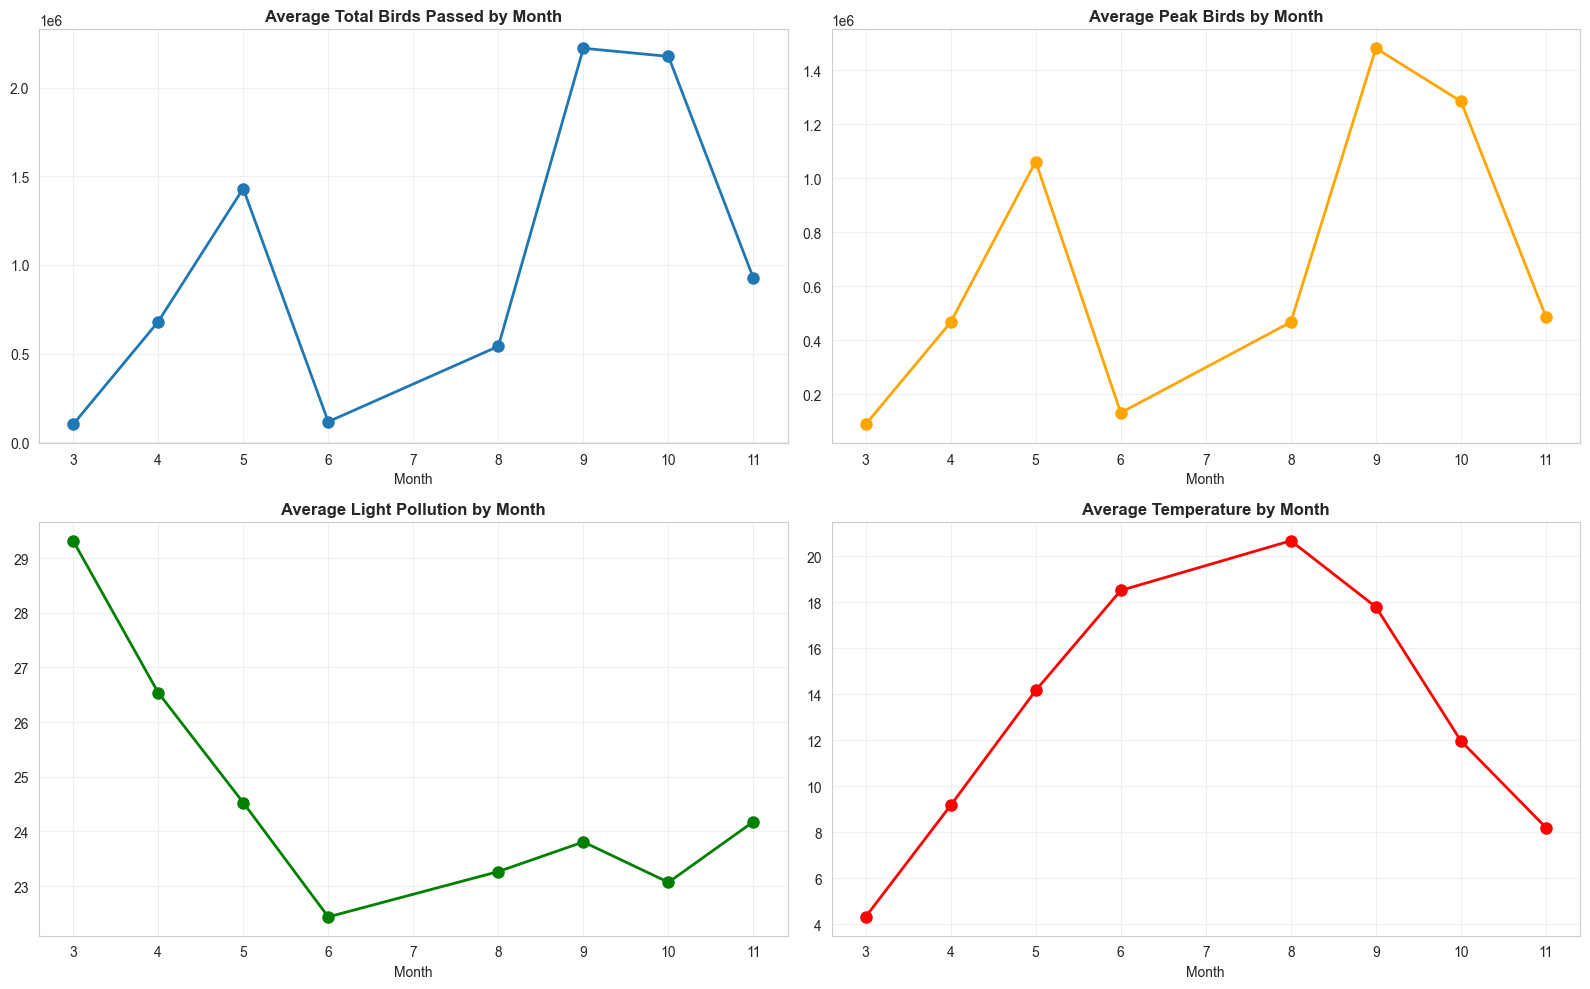

In [84]:
# Visualize temporal trends
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Total birds by month
df.groupby('month')['total_passed'].mean().plot(ax=axes[0, 0], marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('Average Total Birds Passed by Month', fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].grid(True, alpha=0.3)

# Peak birds by month
df.groupby('month')['peak_birds'].mean().plot(ax=axes[0, 1], marker='o', linewidth=2, markersize=8, color='orange')
axes[0, 1].set_title('Average Peak Birds by Month', fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].grid(True, alpha=0.3)

# Light pollution by month
df.groupby('month')['gapfilled_ntl'].mean().plot(ax=axes[1, 0], marker='o', linewidth=2, markersize=8, color='green')
axes[1, 0].set_title('Average Light Pollution by Month', fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].grid(True, alpha=0.3)

# Temperature by month
df.groupby('month')['temperature_2m (°C)'].mean().plot(ax=axes[1, 1], marker='o', linewidth=2, markersize=8, color='red')
axes[1, 1].set_title('Average Temperature by Month', fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Correlation Analysis

In [85]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove columns we don't want in correlation (like flags, day_of_year)
exclude_cols = ['peak_speed_missing', 'peak_altitude_missing', 'day_of_year', 'month', 'year', 'hour']
correlation_cols = [col for col in numeric_cols if col not in exclude_cols]

# Ensure peak_birds is in the list
if 'peak_birds' not in correlation_cols:
    correlation_cols.append('peak_birds')

# Calculate correlation with peak_birds (key migration metric)
print("="*70)
print("CORRELATION WITH PEAK_BIRDS (Migration Activity)")
print("="*70)
correlations = df[correlation_cols].corr()['peak_birds'].sort_values(ascending=False)
print(correlations)

CORRELATION WITH PEAK_BIRDS (Migration Activity)
peak_birds                        1.000000
total_passed                      0.940351
peak_speed_mph                    0.453100
peak_altitude_ft                  0.228433
surface_pressure (hPa)            0.139714
soil_temperature_0_to_7cm (°C)    0.114509
temperature_2m (°C)               0.095703
vapour_pressure_deficit (kPa)     0.092270
apparent_temperature (°C)         0.087415
dew_point_2m (°C)                 0.056710
wind_direction_10m (°)            0.029522
gapfilled_ntl                     0.002582
wind_direction_100m (°)           0.000533
quality_score                    -0.021308
ntl_variability                  -0.025054
lunar_irradiance                 -0.025064
snowfall (cm)                    -0.052851
relative_humidity_2m (%)         -0.070503
wind_speed_10m (km/h)            -0.134844
wind_speed_100m (km/h)           -0.141315
rain (mm)                        -0.146102
wind_gusts_10m (km/h)            -0.153335
cloud

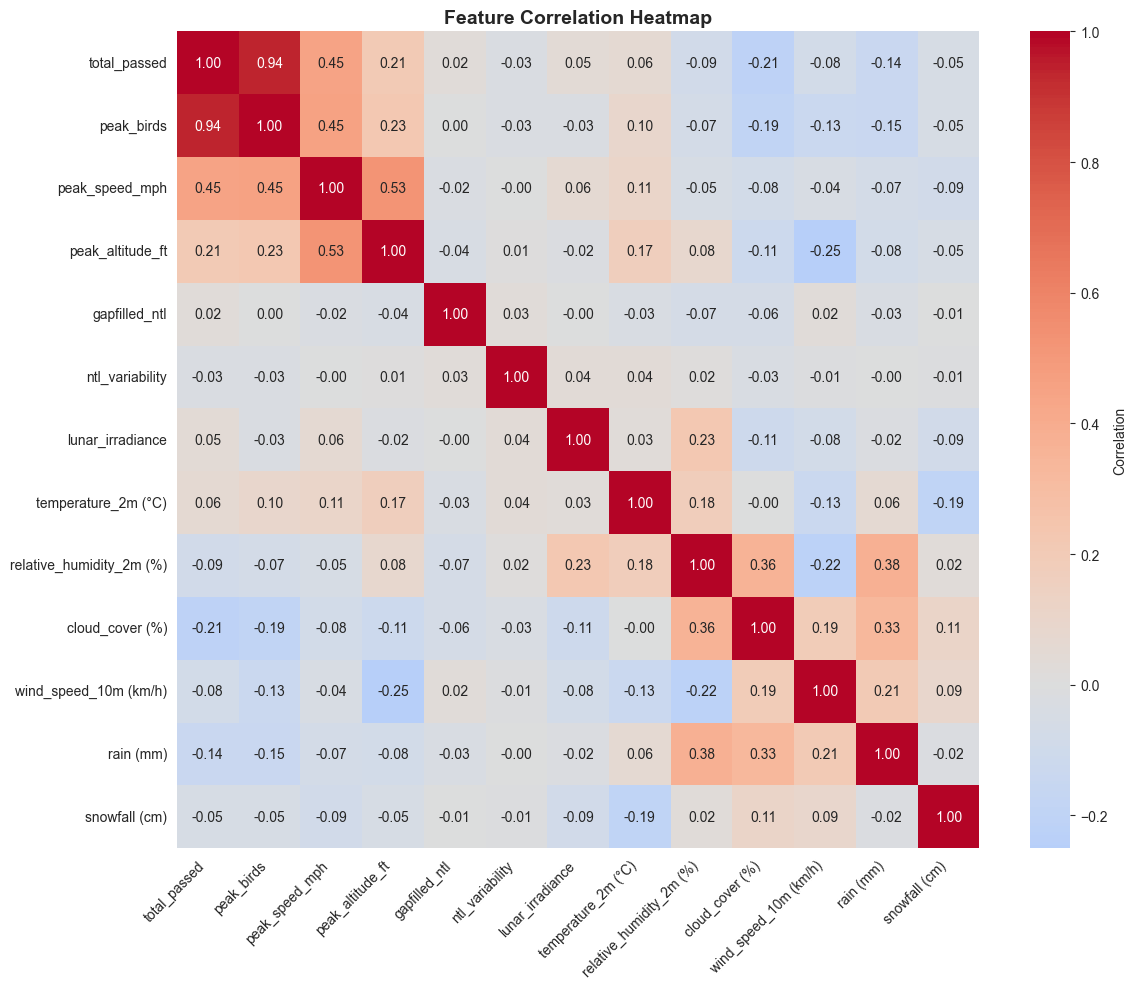

In [86]:
# Create correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Select top features for better visualization
top_features = ['total_passed', 'peak_birds', 'peak_speed_mph', 'peak_altitude_ft',
                'gapfilled_ntl', 'ntl_variability', 'lunar_irradiance',
                'temperature_2m (°C)', 'relative_humidity_2m (%)', 'cloud_cover (%)',
                'wind_speed_10m (km/h)', 'rain (mm)', 'snowfall (cm)']

corr_matrix = df[top_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Feature Correlation Heatmap', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. Relationships Between Key Variables

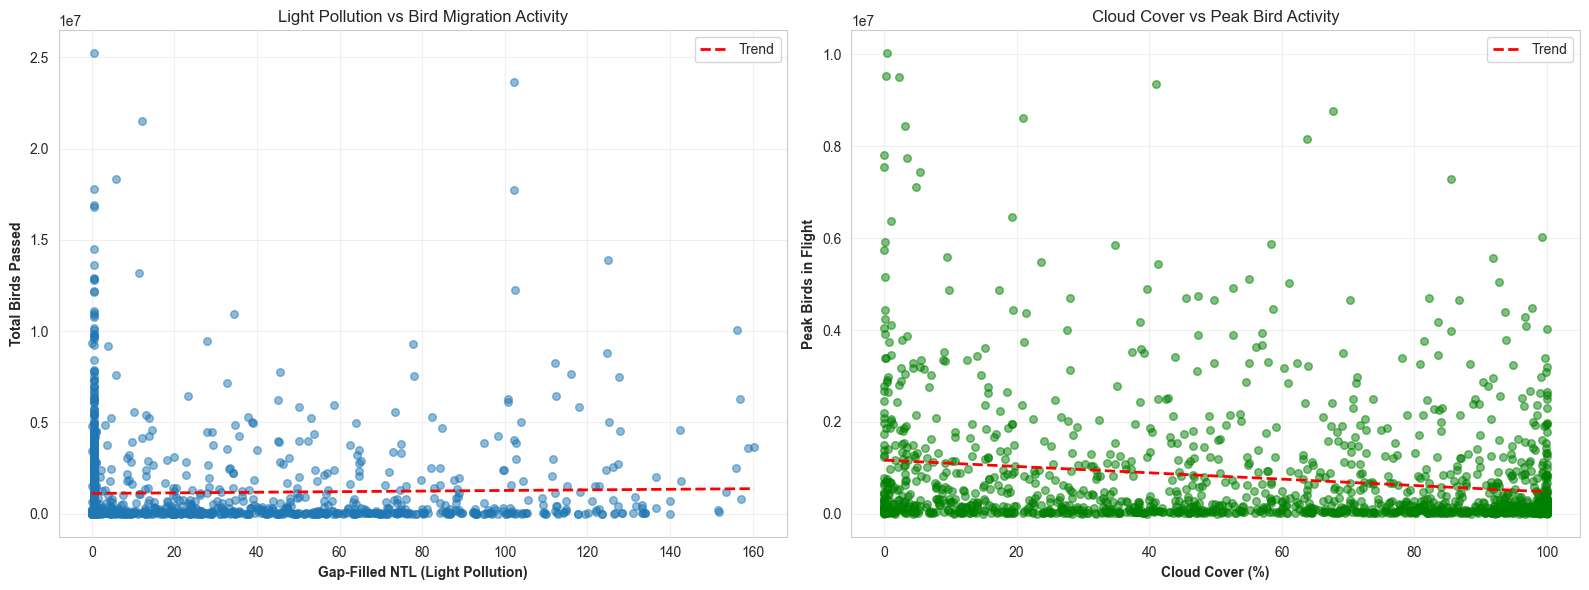

In [87]:
# Explore relationships: Light Pollution vs Bird Activity
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Light pollution vs total birds passed
axes[0].scatter(df['gapfilled_ntl'], df['total_passed'], alpha=0.5, s=30)
axes[0].set_xlabel('Gap-Filled NTL (Light Pollution)', fontweight='bold')
axes[0].set_ylabel('Total Birds Passed', fontweight='bold')
axes[0].set_title('Light Pollution vs Bird Migration Activity')
axes[0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['gapfilled_ntl'].dropna(), df.loc[df['gapfilled_ntl'].notna(), 'total_passed'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['gapfilled_ntl'].min(), df['gapfilled_ntl'].max(), 100)
axes[0].plot(x_line, p(x_line), "r--", linewidth=2, label='Trend')
axes[0].legend()

# Cloud cover vs bird activity
axes[1].scatter(df['cloud_cover (%)'], df['peak_birds'], alpha=0.5, s=30, color='green')
axes[1].set_xlabel('Cloud Cover (%)', fontweight='bold')
axes[1].set_ylabel('Peak Birds in Flight', fontweight='bold')
axes[1].set_title('Cloud Cover vs Peak Bird Activity')
axes[1].grid(True, alpha=0.3)

# Add trend line
z2 = np.polyfit(df['cloud_cover (%)'].dropna(), df.loc[df['cloud_cover (%)'].notna(), 'peak_birds'], 1)
p2 = np.poly1d(z2)
x_line2 = np.linspace(df['cloud_cover (%)'].min(), df['cloud_cover (%)'].max(), 100)
axes[1].plot(x_line2, p2(x_line2), "r--", linewidth=2, label='Trend')
axes[1].legend()

plt.tight_layout()
plt.show()

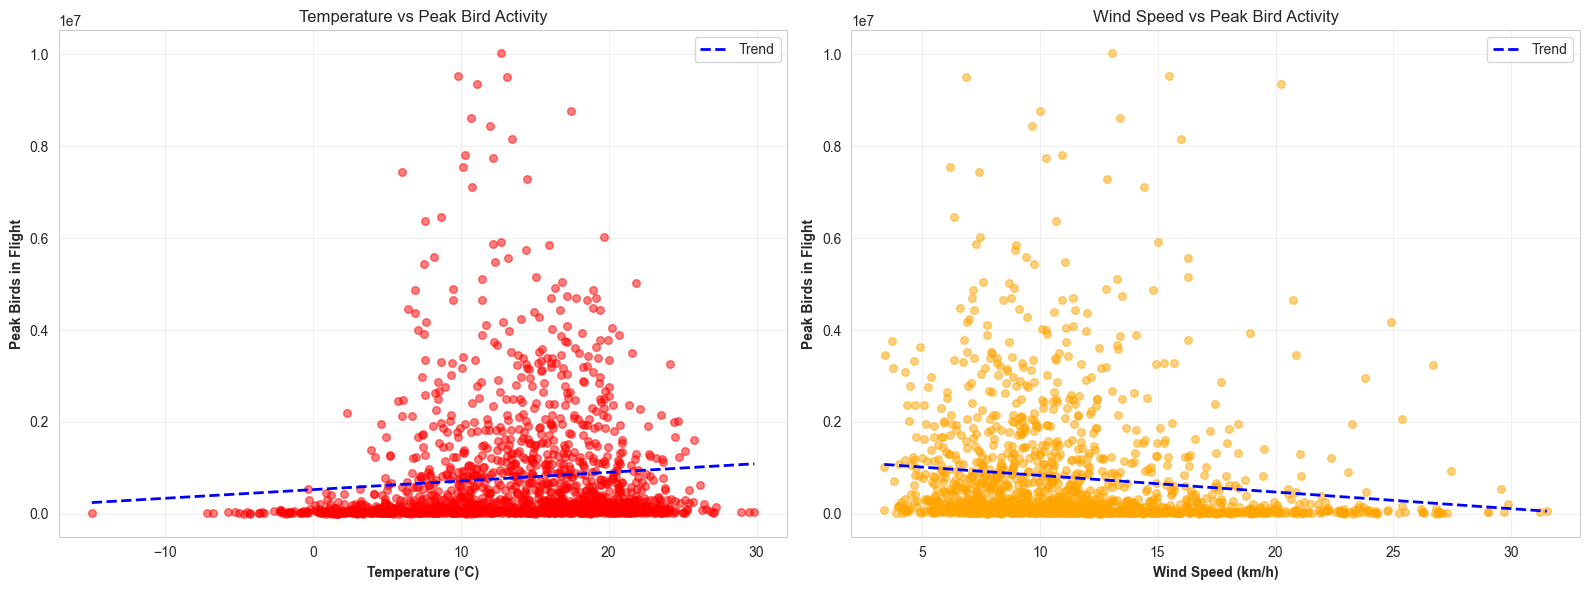

In [88]:
# Temperature and wind effects on migration
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Temperature vs bird activity
axes[0].scatter(df['temperature_2m (°C)'], df['peak_birds'], alpha=0.5, s=30, color='red')
axes[0].set_xlabel('Temperature (°C)', fontweight='bold')
axes[0].set_ylabel('Peak Birds in Flight', fontweight='bold')
axes[0].set_title('Temperature vs Peak Bird Activity')
axes[0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['temperature_2m (°C)'].dropna(), df.loc[df['temperature_2m (°C)'].notna(), 'peak_birds'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['temperature_2m (°C)'].min(), df['temperature_2m (°C)'].max(), 100)
axes[0].plot(x_line, p(x_line), "b--", linewidth=2, label='Trend')
axes[0].legend()

# Wind speed vs bird activity
axes[1].scatter(df['wind_speed_10m (km/h)'], df['peak_birds'], alpha=0.5, s=30, color='orange')
axes[1].set_xlabel('Wind Speed (km/h)', fontweight='bold')
axes[1].set_ylabel('Peak Birds in Flight', fontweight='bold')
axes[1].set_title('Wind Speed vs Peak Bird Activity')
axes[1].grid(True, alpha=0.3)

# Add trend line
z2 = np.polyfit(df['wind_speed_10m (km/h)'].dropna(), df.loc[df['wind_speed_10m (km/h)'].notna(), 'peak_birds'], 1)
p2 = np.poly1d(z2)
x_line2 = np.linspace(df['wind_speed_10m (km/h)'].min(), df['wind_speed_10m (km/h)'].max(), 100)
axes[1].plot(x_line2, p2(x_line2), "b--", linewidth=2, label='Trend')
axes[1].legend()

plt.tight_layout()
plt.show()

## 8. Key Insights & Recommendations

### Summary of Findings

Based on the exploratory data analysis of the merged BirdCast + VIIRS + Weather dataset:

**1. Data Quality:**
- Inner merge retained only records with complete weather data (1,542 observations across 8 months)
- No significant gaps in key columns except for some bird behavior metrics (handled with flags)
- 330 nights (21%) classified as "Low activity" (missing direction data)

**2. Migration Patterns:**
- **Clear bimodal seasonal variation**: Spring peak in May, Fall peaks in September and October
- Lowest activity in March and June
- Primary migration directions: NE, NNE, SW, SSW

**3. Light Pollution Impact (Non-linear Investigation):**
- **Linear correlation is negligible** (r=0.0026), but **non-linear relationships may exist**
- Multiple modeling approaches will test for threshold effects and polynomial relationships
- Quality flags show reliable VIIRS data - data quality is not the issue
- **Spline, Random Forest, and XGBoost models will capture potential non-linear effects**

**4. Weather Influences on Migration:**
Birds show sensitivity to **unfavorable weather conditions**:
- **Cloud cover**: Negative correlation (r=-0.188) - birds fly less when cloudy
- **Wind speed**: Negative correlation (r=-0.135 to -0.153) - high winds reduce flight activity
- **Precipitation**: Negative correlation (r=-0.146) - rain inhibits migration
- **Temperature**: Weak correlation (r=0.096) - minimal direct impact
- **Humidity**: Slight negative correlation (r=-0.071)

**5. Key Insights:**
- Migration is driven by **seasonal/temporal factors** rather than individual weather events
- **Weather acts as a deterrent** to nightly migration when conditions worsen
- VIIRS light pollution variables show weak linear relationships but may have non-linear effects
- Regional differences (NJ vs VT) suggest location-specific migration patterns

**6. Current Modeling Strategy (Notebook 4):**

Three complementary modeling approaches are implemented:

**A. Spline Regression:**
- Flexible polynomial smoothing (degree 3) for each regression target
- Captures non-linear relationships without strict parametric assumptions
- Applied to: peak_birds, total_passed, peak_speed_mph, peak_altitude_ft

**B. Random Forest Models:**
- Ensemble method (100 trees) capturing complex interactions between features
- Feature importance analysis identifies key predictors
- Models for both regression (4 targets) and classification (peak_direction)
- Built for combined data and state-specific (NJ, VT) datasets

**C. XGBoost Models:**
- Gradient boosted decision trees (100 estimators) with enhanced regularization
- Superior handling of mixed feature types and non-linear relationships
- Competitive with Random Forest, with optimized hyperparameters
- Models for combined data and state-specific datasets

**Target Variables:**
- **Regression**: peak_birds, total_passed, peak_speed_mph, peak_altitude_ft
- **Classification**: peak_direction (categorical: N, NE, E, ..., Low activity)

**Data Preparation Strategy:**
- **Sentinel value preservation**: -1 values in peak_speed_mph and peak_altitude_ft are preserved (not filtered)
- These -1 values represent meaningful "missing" patterns that models can learn
- **Missing flags** (peak_speed_missing, peak_altitude_missing) explicitly mark records with missing behavior data
- Tree-based models (RF, XGBoost) can leverage both the -1 sentinel values and binary flags to understand missing data patterns
- This dual approach helps models distinguish between "low migration" and "data not recorded"

**Data Scope:**
- **Combined models**: All data (NJ + VT)
- **State-specific models**: Separate models for NJ and VT to capture regional differences

**Performance Metrics:**
- Regression: RMSE and R² Score
- Classification: Accuracy and Classification Report
- Feature importance rankings for each model
- Cross-comparison across model types and regions

**Expected Outcomes:**
- Identify which model type (spline/RF/XGB) performs best for each target
- Determine whether state-specific models outperform combined models
- Quantify importance of weather, VIIRS, and temporal features
- Detect non-linear effects in light pollution and weather variables
- Understand how missing data patterns (captured by flags and sentinel values) influence predictions